In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image


In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data_dir = '/content/drive/My Drive/DEPI/Cats and Dogs'


In [13]:
import numpy as np
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def resize_and_label_images(data_dir, img_size=(150, 150)):
    labels = []
    images = []

    for label in ['cats', 'dogs']:
        folder = os.path.join(data_dir, label)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            try:
                with Image.open(img_path) as img:
                    img = img.resize(img_size)
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label)
            except (IOError, OSError) as e:
                print(f"Skipping file {img_path}: {e}")

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess data
images, labels = resize_and_label_images(data_dir)

# Ensure data is loaded
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")


Skipping file /content/drive/My Drive/DEPI/Cats and Dogs/cats/_DS_Store: cannot identify image file '/content/drive/My Drive/DEPI/Cats and Dogs/cats/_DS_Store'
Skipping file /content/drive/My Drive/DEPI/Cats and Dogs/dogs/_DS_Store: cannot identify image file '/content/drive/My Drive/DEPI/Cats and Dogs/dogs/_DS_Store'
Number of images: 2023
Number of labels: 2023


In [14]:
# Check if labels are loaded
if labels is not None and len(labels) > 0:
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
else:
    print("Labels are not defined or empty.")


NameError: name 'labels' is not defined

In [15]:
# Split the dataset if labels are available
if labels is not None and len(labels) > 0:
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
else:
    print("Cannot split dataset. Labels are not available.")


In [16]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow(X_train, y_train, subset='training')
validation_generator = datagen.flow(X_train, y_train, subset='validation')
test_generator = datagen.flow(X_test, y_test)


In [17]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[150, 150, 3]))  # Adjust input shape to match image size
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(2, activation="softmax"))  # 2 output units for cats and dogs


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [19]:
history = model2.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - accuracy: 0.5150 - loss: 28.7565 - val_accuracy: 0.5077 - val_loss: 2.1184
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.5322 - loss: 1.4986 - val_accuracy: 0.5077 - val_loss: 1.4194
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 491ms/step - accuracy: 0.5621 - loss: 1.2982 - val_accuracy: 0.5851 - val_loss: 1.0405
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 444ms/step - accuracy: 0.5964 - loss: 1.1921 - val_accuracy: 0.5480 - val_loss: 0.8209
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.6916 - loss: 0.6439 - val_accuracy: 0.5046 - val_loss: 2.2890
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 447ms/step - accuracy: 0.5768 - loss: 1.2991 - val_accuracy: 0.5077 - val_loss: 3.4506
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 477ms/step - accuracy: 0.6120 - loss: 1.4428 - val_accuracy: 0.5511 - val_loss: 1.3216
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 446ms/step - accuracy: 0.6497 - loss: 0.8451 - val_accuracy: 0.55

In [20]:
test_loss, test_acc = model2.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6086 - loss: 0.9172
Test Accuracy: 0.5827160477638245


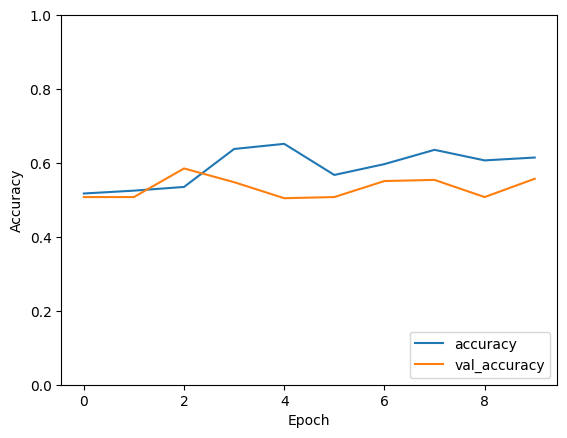

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
